<a href="https://colab.research.google.com/github/TimiUU/wine/blob/main/food_feature_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read the CSV file and delete some unnecessary part.

In [12]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ID2223project/wfp_food_prices_afg.csv')
df = df.drop(0)
df = df.drop(['pricetype', 'currency'], axis=1)
df = df.drop(['admin1', 'admin2'], axis=1)
df.drop(df[df['category'] == 'non-food'].index, inplace=True)
df.drop(df[df['priceflag'] == 'actual'].index, inplace=True)
df = df.drop(['unit', 'priceflag'], axis=1)
df = df.drop(['category', 'usdprice'], axis=1)
df = df.drop(['latitude', 'longitude'], axis=1)
df = df.reset_index(drop=True)
df.head()


,date,market,commodity,price
0,2020-05-15,Badakhshan,Bread,50.0
1,2020-05-15,Badakhshan,Rice (high quality),98.75
2,2020-05-15,Badakhshan,Rice (low quality),66.75
3,2020-05-15,Badakhshan,Wheat,31.0
4,2020-05-15,Badakhshan,Wheat flour (high quality),42.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
unique_values = df['commodity'].unique()
print(unique_values)

['Bread' 'Rice (high quality)' 'Rice (low quality)' 'Wheat'
 'Wheat flour (high quality)' 'Wheat flour (low quality)' 'Salt' 'Sugar'
 'Oil (cooking)' 'Pulses']


In [4]:
unique_values = df['market'].unique()
print(unique_values)

['Badakhshan' 'Badghis' 'Baghlan' 'Balkh' 'Bamyan' 'Daykundi' 'Farah'
 'Faryab' 'Ghazni' 'Ghor' 'Hilmand' 'Hirat' 'Jawzjan' 'Kabul' 'Kandahar'
 'Kapisa' 'Khost' 'Kunar' 'Kunduz' 'Laghman' 'Logar' 'Nangarhar' 'Nimroz'
 'Nuristan' 'Paktika' 'Paktya' 'Panjsher' 'Parwan' 'Samangan' 'Sar-e-Pul'
 'Takhar' 'Uruzgan' 'Maidan Wardak' 'Zabul']


Transfer the market name and food name in One-Hot Encoding.

In [13]:
df_encoded = pd.get_dummies(df, columns=['market', 'commodity'])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14938 entries, 0 to 14937
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   date                                  14938 non-null  object
 1   price                                 14938 non-null  object
 2   market_Badakhshan                     14938 non-null  uint8 
 3   market_Badghis                        14938 non-null  uint8 
 4   market_Baghlan                        14938 non-null  uint8 
 5   market_Balkh                          14938 non-null  uint8 
 6   market_Bamyan                         14938 non-null  uint8 
 7   market_Daykundi                       14938 non-null  uint8 
 8   market_Farah                          14938 non-null  uint8 
 9   market_Faryab                         14938 non-null  uint8 
 10  market_Ghazni                         14938 non-null  uint8 
 11  market_Ghor                 

In [14]:
df_encoded.head()

,date,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,...,commodity_Bread,commodity_Oil (cooking),commodity_Pulses,commodity_Rice (high quality),commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality)
0,2020-05-15,50.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020-05-15,98.75,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2020-05-15,66.75,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2020-05-15,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020-05-15,42.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

df_encoded['date'] = pd.to_datetime(df_encoded['date'])
df_encoded.sort_values('date', inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14938 entries, 0 to 14937
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  14938 non-null  datetime64[ns]
 1   price                                 14938 non-null  object        
 2   market_Badakhshan                     14938 non-null  uint8         
 3   market_Badghis                        14938 non-null  uint8         
 4   market_Baghlan                        14938 non-null  uint8         
 5   market_Balkh                          14938 non-null  uint8         
 6   market_Bamyan                         14938 non-null  uint8         
 7   market_Daykundi                       14938 non-null  uint8         
 8   market_Farah                          14938 non-null  uint8         
 9   market_Faryab                         14938 non-null  uint8         
 10

In [18]:
df_encoded['year'] = df_encoded['date'].dt.year
df_encoded['month'] = df_encoded['date'].dt.month
df_encoded['day'] = df_encoded['date'].dt.day
df_encoded.head()

,date,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,...,commodity_Rice (high quality),commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality),year,month,day
0,2020-05-15,50.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
231,2020-05-15,84.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2020,5,15
230,2020-05-15,50.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
229,2020-05-15,133.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
228,2020-05-15,101.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15


In [ ]:
df_encoded= df_encoded.drop(['date'], axis=1)


In [21]:
df_encoded.head()

,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,market_Ghazni,...,commodity_Rice (high quality),commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality),year,month,day
0,50.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
231,84.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,2020,5,15
230,50.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
229,133.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15
228,101.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2020,5,15


In [22]:
df_encoded['date_as_integer'] = df_encoded['year'] * 10000 + df_encoded['month'] * 100 + df_encoded['day']
df_encoded.head()

,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,market_Ghazni,...,commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality),year,month,day,date_as_integer
0,50.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,5,15,20200515
231,84.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,5,15,20200515
230,50.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,5,15,20200515
229,133.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,5,15,20200515
228,101.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2020,5,15,20200515


In [26]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['market', 'commodity']])

scaler = MinMaxScaler()
df_encoded['price'] = scaler.fit_transform(df_encoded[['price']])
df_encoded['date_as_integer'] = scaler.fit_transform(df_encoded[['date_as_integer']])

encoded_df = pd.concat([pd.DataFrame(encoded_data.toarray()), df_encoded['price'], df_encoded['date_as_integer']], axis=1)

encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14938 entries, 0 to 14937
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                14938 non-null  float64
 1   1                14938 non-null  float64
 2   2                14938 non-null  float64
 3   3                14938 non-null  float64
 4   4                14938 non-null  float64
 5   5                14938 non-null  float64
 6   6                14938 non-null  float64
 7   7                14938 non-null  float64
 8   8                14938 non-null  float64
 9   9                14938 non-null  float64
 10  10               14938 non-null  float64
 11  11               14938 non-null  float64
 12  12               14938 non-null  float64
 13  13               14938 non-null  float64
 14  14               14938 non-null  float64
 15  15               14938 non-null  float64
 16  16               14938 non-null  float64
 17  17          

In [30]:
encoded_df.to_csv('/content/drive/MyDrive/ID2223project/encoded_df.csv', index=False)

In [27]:
window_size = 30

In [28]:
X = []
y = []
for i in range(window_size, len(encoded_df)):
    X.append(encoded_df.iloc[i-window_size:i, :-1].values)
    y.append(encoded_df.iloc[i, -1])

In [29]:
import numpy as np
X, y = np.array(X), np.array(y)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=True))  # 添加额外的LSTM层
model.add(LSTM(units=50))  # 添加额外的LSTM层
model.add(Dense(units=1))
es = EarlyStopping(monitor='val_loss', mode='min', patience=30)

In [32]:
model.compile(optimizer='adam', loss='mse')

In [33]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)  # 调整学习率
model.compile(optimizer=optimizer, loss='mse')

In [34]:
print(y_train)

[0.         0.         0.         ... 0.97394137 0.97394137 0.97394137]


In [35]:
print(y_test)

[0.97394137 0.97394137 0.97394137 ... 1.         1.         1.        ]


In [36]:
model.fit(X_train, y_train, epochs=100, callbacks=[es],batch_size=32)

Epoch 1/100
373/373 [==============================] - ETA: 0s - loss: 0.0493

373/373 [==============================] - 29s 55ms/step - loss: 0.0493
Epoch 2/100
372/373 [============================>.] - ETA: 0s - loss: 0.0247

373/373 [==============================] - 20s 52ms/step - loss: 0.0247
Epoch 3/100
372/373 [============================>.] - ETA: 0s - loss: 0.0240

373/373 [==============================] - 19s 50ms/step - loss: 0.0240
Epoch 4/100
372/373 [============================>.] - ETA: 0s - loss: 0.0228

373/373 [==============================] - 18s 50ms/step - loss: 0.0228
Epoch 5/100
372/373 [============================>.] - ETA: 0s - loss: 0.0227

373/373 [==============================] - 19s 50ms/step - loss: 0.0227
Epoch 6/100
372/373 [============================>.] - ETA: 0s - loss: 0.0221

373/373 [==============================] - 19s 50ms/step - loss: 0.0221
Epoch 7/100
373/373 [==============================] - ETA: 0s - loss: 0.0210

373/373 [==============================] - 20s 54ms/step - loss: 0.0210
Epoch 8/100
372/373 [============================>.] - ETA: 0s - loss: 0.0204

373/373 [==============================] - 20s 53ms/step - loss: 0.0204
Epoch 9/100
373/373 [==============================] - ETA: 0s - loss: 0.0203

373/373 [==============================] - 18s 50ms/step - loss: 0.0203
Epoch 10/100
372/373 [============================>.] - ETA: 0s - loss: 0.0196

373/373 [==============================] - 18s 49ms/step - loss: 0.0196
Epoch 11/100
372/373 [============================>.] - ETA: 0s - loss: 0.0194

373/373 [==============================] - 18s 49ms/step - loss: 0.0194
Epoch 12/100
373/373 [==============================] - ETA: 0s - loss: 0.0190

373/373 [==============================] - 18s 49ms/step - loss: 0.0190
Epoch 13/100
373/373 [==============================] - ETA: 0s - loss: 0.0176

373/373 [==============================] - 20s 53ms/step - loss: 0.0176
Epoch 14/100
373/373 [==============================] - ETA: 0s - loss: 0.0161

373/373 [==============================] - 20s 53ms/step - loss: 0.0161
Epoch 15/100
372/373 [============================>.] - ETA: 0s - loss: 0.0126

373/373 [==============================] - 18s 49ms/step - loss: 0.0126
Epoch 16/100
373/373 [==============================] - ETA: 0s - loss: 0.0107

373/373 [==============================] - 18s 49ms/step - loss: 0.0107
Epoch 17/100
372/373 [============================>.] - ETA: 0s - loss: 0.0092

373/373 [==============================] - 18s 50ms/step - loss: 0.0092
Epoch 18/100
372/373 [============================>.] - ETA: 0s - loss: 0.0081

373/373 [==============================] - 19s 50ms/step - loss: 0.0081
Epoch 19/100
373/373 [==============================] - ETA: 0s - loss: 0.0075

373/373 [==============================] - 19s 52ms/step - loss: 0.0075
Epoch 20/100
373/373 [==============================] - ETA: 0s - loss: 0.0070

373/373 [==============================] - 20s 54ms/step - loss: 0.0070
Epoch 21/100
372/373 [============================>.] - ETA: 0s - loss: 0.0069

373/373 [==============================] - 19s 50ms/step - loss: 0.0069
Epoch 22/100
372/373 [============================>.] - ETA: 0s - loss: 0.0059

373/373 [==============================] - 18s 49ms/step - loss: 0.0059
Epoch 23/100
373/373 [==============================] - ETA: 0s - loss: 0.0057

373/373 [==============================] - 19s 50ms/step - loss: 0.0057
Epoch 24/100
373/373 [==============================] - ETA: 0s - loss: 0.0054

373/373 [==============================] - 19s 50ms/step - loss: 0.0054
Epoch 25/100
373/373 [==============================] - ETA: 0s - loss: 0.0050

373/373 [==============================] - 19s 50ms/step - loss: 0.0050
Epoch 26/100
373/373 [==============================] - ETA: 0s - loss: 0.0047

373/373 [==============================] - 20s 54ms/step - loss: 0.0047
Epoch 27/100
372/373 [============================>.] - ETA: 0s - loss: 0.0041

373/373 [==============================] - 19s 51ms/step - loss: 0.0041
Epoch 28/100
373/373 [==============================] - ETA: 0s - loss: 0.0041

373/373 [==============================] - 18s 50ms/step - loss: 0.0041
Epoch 29/100
372/373 [============================>.] - ETA: 0s - loss: 0.0039

373/373 [==============================] - 19s 50ms/step - loss: 0.0039
Epoch 30/100
372/373 [============================>.] - ETA: 0s - loss: 0.0038

373/373 [==============================] - 19s 50ms/step - loss: 0.0038
Epoch 31/100
373/373 [==============================] - ETA: 0s - loss: 0.0038

373/373 [==============================] - 19s 50ms/step - loss: 0.0038
Epoch 32/100
373/373 [==============================] - ETA: 0s - loss: 0.0036

373/373 [==============================] - 20s 54ms/step - loss: 0.0036
Epoch 33/100
372/373 [============================>.] - ETA: 0s - loss: 0.0034

373/373 [==============================] - 19s 52ms/step - loss: 0.0034
Epoch 34/100
373/373 [==============================] - ETA: 0s - loss: 0.0034

373/373 [==============================] - 19s 50ms/step - loss: 0.0034
Epoch 35/100
373/373 [==============================] - ETA: 0s - loss: 0.0031

373/373 [==============================] - 18s 50ms/step - loss: 0.0031
Epoch 36/100
373/373 [==============================] - ETA: 0s - loss: 0.0034

373/373 [==============================] - 19s 50ms/step - loss: 0.0034
Epoch 37/100
373/373 [==============================] - ETA: 0s - loss: 0.0026

373/373 [==============================] - 19s 50ms/step - loss: 0.0026
Epoch 38/100
373/373 [==============================] - ETA: 0s - loss: 0.0028

373/373 [==============================] - 20s 53ms/step - loss: 0.0028
Epoch 39/100
372/373 [============================>.] - ETA: 0s - loss: 0.0028

373/373 [==============================] - 20s 53ms/step - loss: 0.0028
Epoch 40/100
373/373 [==============================] - ETA: 0s - loss: 0.0025

373/373 [==============================] - 19s 50ms/step - loss: 0.0025
Epoch 41/100
372/373 [============================>.] - ETA: 0s - loss: 0.0024

373/373 [==============================] - 19s 50ms/step - loss: 0.0024
Epoch 42/100
372/373 [============================>.] - ETA: 0s - loss: 0.0023

373/373 [==============================] - 19s 50ms/step - loss: 0.0024
Epoch 43/100
372/373 [============================>.] - ETA: 0s - loss: 0.0022

373/373 [==============================] - 19s 50ms/step - loss: 0.0022
Epoch 44/100
373/373 [==============================] - ETA: 0s - loss: 0.0024

373/373 [==============================] - 20s 52ms/step - loss: 0.0024
Epoch 45/100
373/373 [==============================] - ETA: 0s - loss: 0.0023

373/373 [==============================] - 20s 54ms/step - loss: 0.0023
Epoch 46/100
373/373 [==============================] - ETA: 0s - loss: 0.0021

373/373 [==============================] - 18s 50ms/step - loss: 0.0021
Epoch 47/100
372/373 [============================>.] - ETA: 0s - loss: 0.0021

373/373 [==============================] - 19s 50ms/step - loss: 0.0021
Epoch 48/100
373/373 [==============================] - ETA: 0s - loss: 0.0021

373/373 [==============================] - 19s 51ms/step - loss: 0.0021
Epoch 49/100
373/373 [==============================] - ETA: 0s - loss: 0.0020

373/373 [==============================] - 19s 50ms/step - loss: 0.0020
Epoch 50/100
372/373 [============================>.] - ETA: 0s - loss: 0.0021

373/373 [==============================] - 20s 54ms/step - loss: 0.0021
Epoch 51/100
373/373 [==============================] - ETA: 0s - loss: 0.0017

373/373 [==============================] - 18s 49ms/step - loss: 0.0017
Epoch 52/100
372/373 [============================>.] - ETA: 0s - loss: 0.0018

373/373 [==============================] - 18s 49ms/step - loss: 0.0018
Epoch 53/100
373/373 [==============================] - ETA: 0s - loss: 0.0033

373/373 [==============================] - 18s 49ms/step - loss: 0.0033
Epoch 54/100
373/373 [==============================] - ETA: 0s - loss: 0.0019

373/373 [==============================] - 21s 55ms/step - loss: 0.0019
Epoch 55/100
372/373 [============================>.] - ETA: 0s - loss: 0.0015

373/373 [==============================] - 18s 49ms/step - loss: 0.0015
Epoch 56/100
372/373 [============================>.] - ETA: 0s - loss: 0.0016

373/373 [==============================] - 18s 48ms/step - loss: 0.0016
Epoch 57/100
373/373 [==============================] - ETA: 0s - loss: 0.0017

373/373 [==============================] - 18s 49ms/step - loss: 0.0017
Epoch 58/100
373/373 [==============================] - ETA: 0s - loss: 0.0019

373/373 [==============================] - 19s 52ms/step - loss: 0.0019
Epoch 59/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 51ms/step - loss: 0.0011
Epoch 60/100
372/373 [============================>.] - ETA: 0s - loss: 0.0015

373/373 [==============================] - 18s 49ms/step - loss: 0.0015
Epoch 61/100
373/373 [==============================] - ETA: 0s - loss: 0.0013

373/373 [==============================] - 18s 49ms/step - loss: 0.0013
Epoch 62/100
373/373 [==============================] - ETA: 0s - loss: 0.0013

373/373 [==============================] - 20s 52ms/step - loss: 0.0013
Epoch 63/100
372/373 [============================>.] - ETA: 0s - loss: 0.0012

373/373 [==============================] - 19s 51ms/step - loss: 0.0012
Epoch 64/100
372/373 [============================>.] - ETA: 0s - loss: 0.0015

373/373 [==============================] - 18s 49ms/step - loss: 0.0015
Epoch 65/100
372/373 [============================>.] - ETA: 0s - loss: 0.0014

373/373 [==============================] - 18s 49ms/step - loss: 0.0014
Epoch 66/100
373/373 [==============================] - ETA: 0s - loss: 0.0017

373/373 [==============================] - 19s 50ms/step - loss: 0.0017
Epoch 67/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 20s 53ms/step - loss: 0.0011
Epoch 68/100
373/373 [==============================] - ETA: 0s - loss: 0.0014

373/373 [==============================] - 18s 49ms/step - loss: 0.0014
Epoch 69/100
372/373 [============================>.] - ETA: 0s - loss: 0.0014

373/373 [==============================] - 18s 49ms/step - loss: 0.0014
Epoch 70/100
373/373 [==============================] - ETA: 0s - loss: 9.0409e-04

373/373 [==============================] - 19s 51ms/step - loss: 9.0409e-04
Epoch 71/100
372/373 [============================>.] - ETA: 0s - loss: 9.7545e-04

373/373 [==============================] - 20s 53ms/step - loss: 9.7637e-04
Epoch 72/100
372/373 [============================>.] - ETA: 0s - loss: 0.0014

373/373 [==============================] - 18s 49ms/step - loss: 0.0014
Epoch 73/100
373/373 [==============================] - ETA: 0s - loss: 0.0013

373/373 [==============================] - 18s 49ms/step - loss: 0.0013
Epoch 74/100
373/373 [==============================] - ETA: 0s - loss: 0.0010

373/373 [==============================] - 19s 51ms/step - loss: 0.0010
Epoch 75/100
373/373 [==============================] - ETA: 0s - loss: 9.7221e-04

373/373 [==============================] - 20s 52ms/step - loss: 9.7221e-04
Epoch 76/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 50ms/step - loss: 0.0011
Epoch 77/100
373/373 [==============================] - ETA: 0s - loss: 8.6827e-04

373/373 [==============================] - 19s 51ms/step - loss: 8.6827e-04
Epoch 78/100
373/373 [==============================] - ETA: 0s - loss: 0.0013

373/373 [==============================] - 22s 59ms/step - loss: 0.0013
Epoch 79/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 51ms/step - loss: 0.0011
Epoch 80/100
372/373 [============================>.] - ETA: 0s - loss: 7.4613e-04

373/373 [==============================] - 22s 59ms/step - loss: 7.4488e-04
Epoch 81/100
372/373 [============================>.] - ETA: 0s - loss: 0.0010

373/373 [==============================] - 18s 50ms/step - loss: 0.0010
Epoch 82/100
373/373 [==============================] - ETA: 0s - loss: 6.0027e-04

373/373 [==============================] - 20s 53ms/step - loss: 6.0027e-04
Epoch 83/100
372/373 [============================>.] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 51ms/step - loss: 0.0011
Epoch 84/100
373/373 [==============================] - ETA: 0s - loss: 0.0012

373/373 [==============================] - 18s 49ms/step - loss: 0.0012
Epoch 85/100
372/373 [============================>.] - ETA: 0s - loss: 8.1844e-04

373/373 [==============================] - 18s 49ms/step - loss: 8.1717e-04
Epoch 86/100
373/373 [==============================] - ETA: 0s - loss: 7.3211e-04

373/373 [==============================] - 20s 53ms/step - loss: 7.3211e-04
Epoch 87/100
372/373 [============================>.] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 51ms/step - loss: 0.0011
Epoch 88/100
373/373 [==============================] - ETA: 0s - loss: 7.1988e-04

373/373 [==============================] - 18s 49ms/step - loss: 7.1988e-04
Epoch 89/100
373/373 [==============================] - ETA: 0s - loss: 5.9357e-04

373/373 [==============================] - 18s 49ms/step - loss: 5.9357e-04
Epoch 90/100
373/373 [==============================] - ETA: 0s - loss: 6.4819e-04

373/373 [==============================] - 19s 52ms/step - loss: 6.4819e-04
Epoch 91/100
373/373 [==============================] - ETA: 0s - loss: 0.0010

373/373 [==============================] - 19s 51ms/step - loss: 0.0010
Epoch 92/100
372/373 [============================>.] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 18s 49ms/step - loss: 0.0011
Epoch 93/100
372/373 [============================>.] - ETA: 0s - loss: 9.0518e-04

373/373 [==============================] - 18s 49ms/step - loss: 9.0572e-04
Epoch 94/100
373/373 [==============================] - ETA: 0s - loss: 5.8395e-04

373/373 [==============================] - 19s 51ms/step - loss: 5.8395e-04
Epoch 95/100
373/373 [==============================] - ETA: 0s - loss: 5.6954e-04

373/373 [==============================] - 20s 52ms/step - loss: 5.6954e-04
Epoch 96/100
372/373 [============================>.] - ETA: 0s - loss: 3.8115e-04

373/373 [==============================] - 18s 49ms/step - loss: 3.8067e-04
Epoch 97/100
373/373 [==============================] - ETA: 0s - loss: 4.5897e-04

373/373 [==============================] - 18s 49ms/step - loss: 4.5897e-04
Epoch 98/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 19s 51ms/step - loss: 0.0011
Epoch 99/100
372/373 [============================>.] - ETA: 0s - loss: 6.4177e-04

373/373 [==============================] - 20s 54ms/step - loss: 6.4077e-04
Epoch 100/100
373/373 [==============================] - ETA: 0s - loss: 0.0011

373/373 [==============================] - 18s 49ms/step - loss: 0.0011


In [37]:
predicted_prices = model.predict(X_test)

94/94 [==============================] - 4s 20ms/step


In [40]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [38]:

print(predicted_prices[:5])


[[0.9715301]
 [0.97839  ]
 [0.972059 ]
 [0.9615145]
 [0.9626632]]


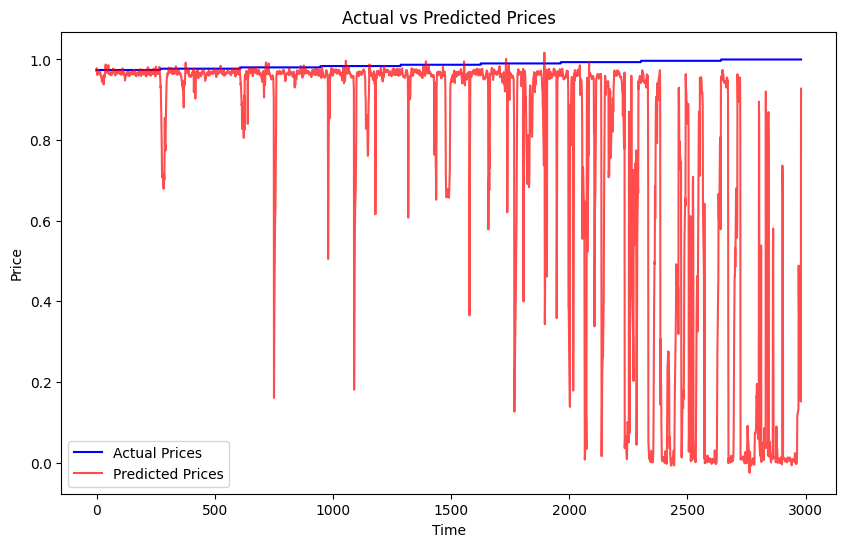

In [39]:
import matplotlib.pyplot as plt

actual_prices = y_test

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', alpha=0.7, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
import pandas as pd

results = pd.DataFrame({'Actual': actual_prices.flatten(), 'Predicted': predicted_prices.flatten()})
print(results.head())


     Actual  Predicted
0  0.973941   0.971530
1  0.973941   0.978390
2  0.973941   0.972059
3  0.973941   0.961514
4  0.973941   0.962663


In [41]:
results = []
for i, prediction in enumerate(predicted_prices):

    market_food_encoding = X_test[i, -1, :len(encoder.categories_[0])+len(encoder.categories_[1])]
    market_food = encoder.inverse_transform([market_food_encoding])[0]


    date = df.iloc[i + window_size]['date']


    result = {'date': date, 'market': market_food[0], 'food': market_food[1], 'predicted_price': prediction[0]}
    results.append(result)

results_df = pd.DataFrame(results)
results_df.head()



,date,market,food,predicted_price
0,2020-05-15,Farah,Oil (cooking),0.971530
1,2020-05-15,Farah,Pulses,0.978390
2,2020-05-15,Faryab,Bread,0.972059
3,2020-05-15,Faryab,Rice (high quality),0.961514
4,2020-05-15,Faryab,Rice (low quality),0.962663


In [51]:
results_df.to_csv('/content/drive/MyDrive/ID2223project/predicted_prices.csv', index=False)

Split the data to traning set and test set.

In [52]:
split_point = int(len(df_encoded) * 0.8)
train_df = df_encoded[:split_point]
test_df = df_encoded[split_point:]
train_df.head()

,date,price,market_Badakhshan,market_Badghis,market_Baghlan,market_Balkh,market_Bamyan,market_Daykundi,market_Farah,market_Faryab,...,commodity_Bread,commodity_Oil (cooking),commodity_Pulses,commodity_Rice (high quality),commodity_Rice (low quality),commodity_Salt,commodity_Sugar,commodity_Wheat,commodity_Wheat flour (high quality),commodity_Wheat flour (low quality)
0,2020-05-15,50.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2020-05-15,98.75,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2020-05-15,66.75,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2020-05-15,31.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020-05-15,42.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
trasn_df = pd.DataFrame(transformed.toarray(), columns=encoder.get_feature_names_out())
df = pd.concat([df, ohe_df], axis=1)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ID2223project/predicted_prices.csv')

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(X_train, X_test, y_train, y_test, model):

    report = {}

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    y_pred = model.predict(X_test)

    model_name=LSTM

    # 存储评估结果到 report 字典
    report[model_name] = {
        "R2 SCORE": r2score,
        "MEAN SQUARED ERROR": mse,
        "MEAN ABSOLUTE ERROR": mae
    }

    return report

In [43]:
model_matrics = evaluate_model(X_train, X_test, y_train, y_test, model)
for model_name, metrics in model_matrics.items():
    print(f"{model_name} Metrics:")
    print(f"  Accuracy: {metrics['R2 SCORE']}")
    print(f"  Mean Squared Error: {metrics['MEAN SQUARED ERROR']}")
    print(f"  Mean Absolute Error: {metrics['MEAN ABSOLUTE ERROR']}")
    print("\n" + "=" * 30 + "\n")

94/94 [==============================] - 1s 14ms/step
<class 'keras.src.layers.rnn.lstm.LSTM'> Metrics:
  Accuracy: -3048.262411900927
  Mean Squared Error: 0.2084241578192845
  Mean Absolute Error: 0.2507398849556009




In [ ]:
import gradio as gr
import numpy as np


def Price_predict_input(Date, Market,Food_type):
  input= np.array(Date,Market,Food_type)
  price=model.predict(input)
  predicted_prices = scaler.inverse_transform(price)
  return predicted_prices


Date_selectbox = gr.SelectBox(choices=["January", "February", "March", "April", "May", "June",
                                       "July", "August", "September", "October" ,"November" ,"December"], label="Choose an mouth:")

Market_selectbox = gr.SelectBox(choices=["January", "February", "March", "April", "May", "June",
                                       "July", "August", "September", "October" ,"November" ,"December"], label="Choose a market:")

Food_type_selectbox = gr.SelectBox(choices=["'Bread", "Rice (high quality)", "Rice (low quality)", "Wheat", "Wheat flour (high quality)",
                                            "Wheat flour (low quality)", "Salt", "Sugar", "Oil (cooking)", "Pulses"], label="Choose a type of food:")



iface = gr.Interface(
    fn=Price_predict_input,
    inputs=[
             Date_selectbox,
             Market_selectbox,
             Food_type_selectbox,
             ],
    outputs="text",
    title="Pridict of food price",
    description=".",
)

iface.launch(share=True)